In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# RobustScaler is used here for preprocessing the data before correlation,
# but note that for model training, its application might be part of the ML pipeline.
from sklearn.preprocessing import RobustScaler 


In [12]:

# --- 1. Load the Dataset ---
# IMPORTANT: Adjust the path to your Train_data.csv file
train = pd.read_csv('C:/Users/User/OneDrive/Desktop/Terra net Training/archive/Train_data.csv')
test = pd.read_csv('C:/Users/User/OneDrive/Desktop/Terra net Training/archive/Test_data.csv')
print("--- Initial Data Description ---")
print(train.describe())
print("\n--- First 5 rows of the dataset ---")
print(train.head())
print("\n--- Dataset Information (Data Types, Non-Null Counts) ---")
print(train.info())


--- Initial Data Description ---
           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.1542


--- Class Distribution Plot ---


C:\Users\User\AppData\Local\Temp\ipykernel_8600\3660393830.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['normal', 'anomaly']) # Assuming 0 is anomaly, 1 is normal based on your code


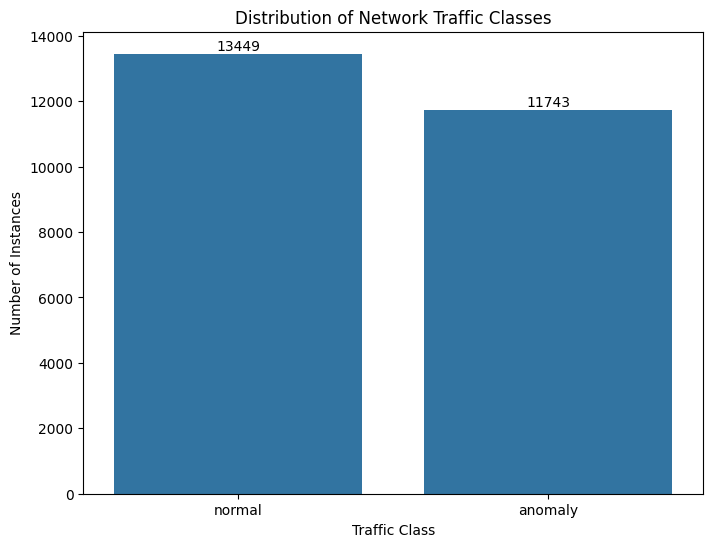

In [13]:

# --- 2. Analyze Class Distribution ---
# This plot shows the breakdown of 'normal' vs. 'anomaly' instances in your training data.
print("\n--- Class Distribution Plot ---")
plt.figure(figsize=(8, 6)) # Set a reasonable figure size
ax = sns.countplot(x=train["class"])
abs_values = train["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly']) # Assuming 0 is anomaly, 1 is normal based on your code
plt.xlabel("Traffic Class")
plt.ylabel("Number of Instances")
plt.title("Distribution of Network Traffic Classes")
plt.show()



--- Categorical Feature Distributions by Class ---


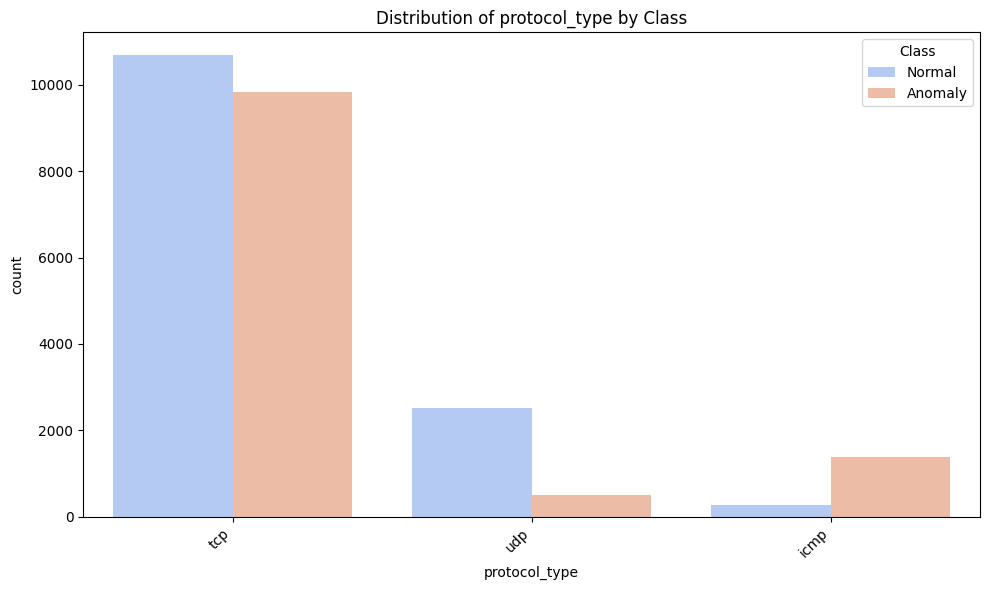

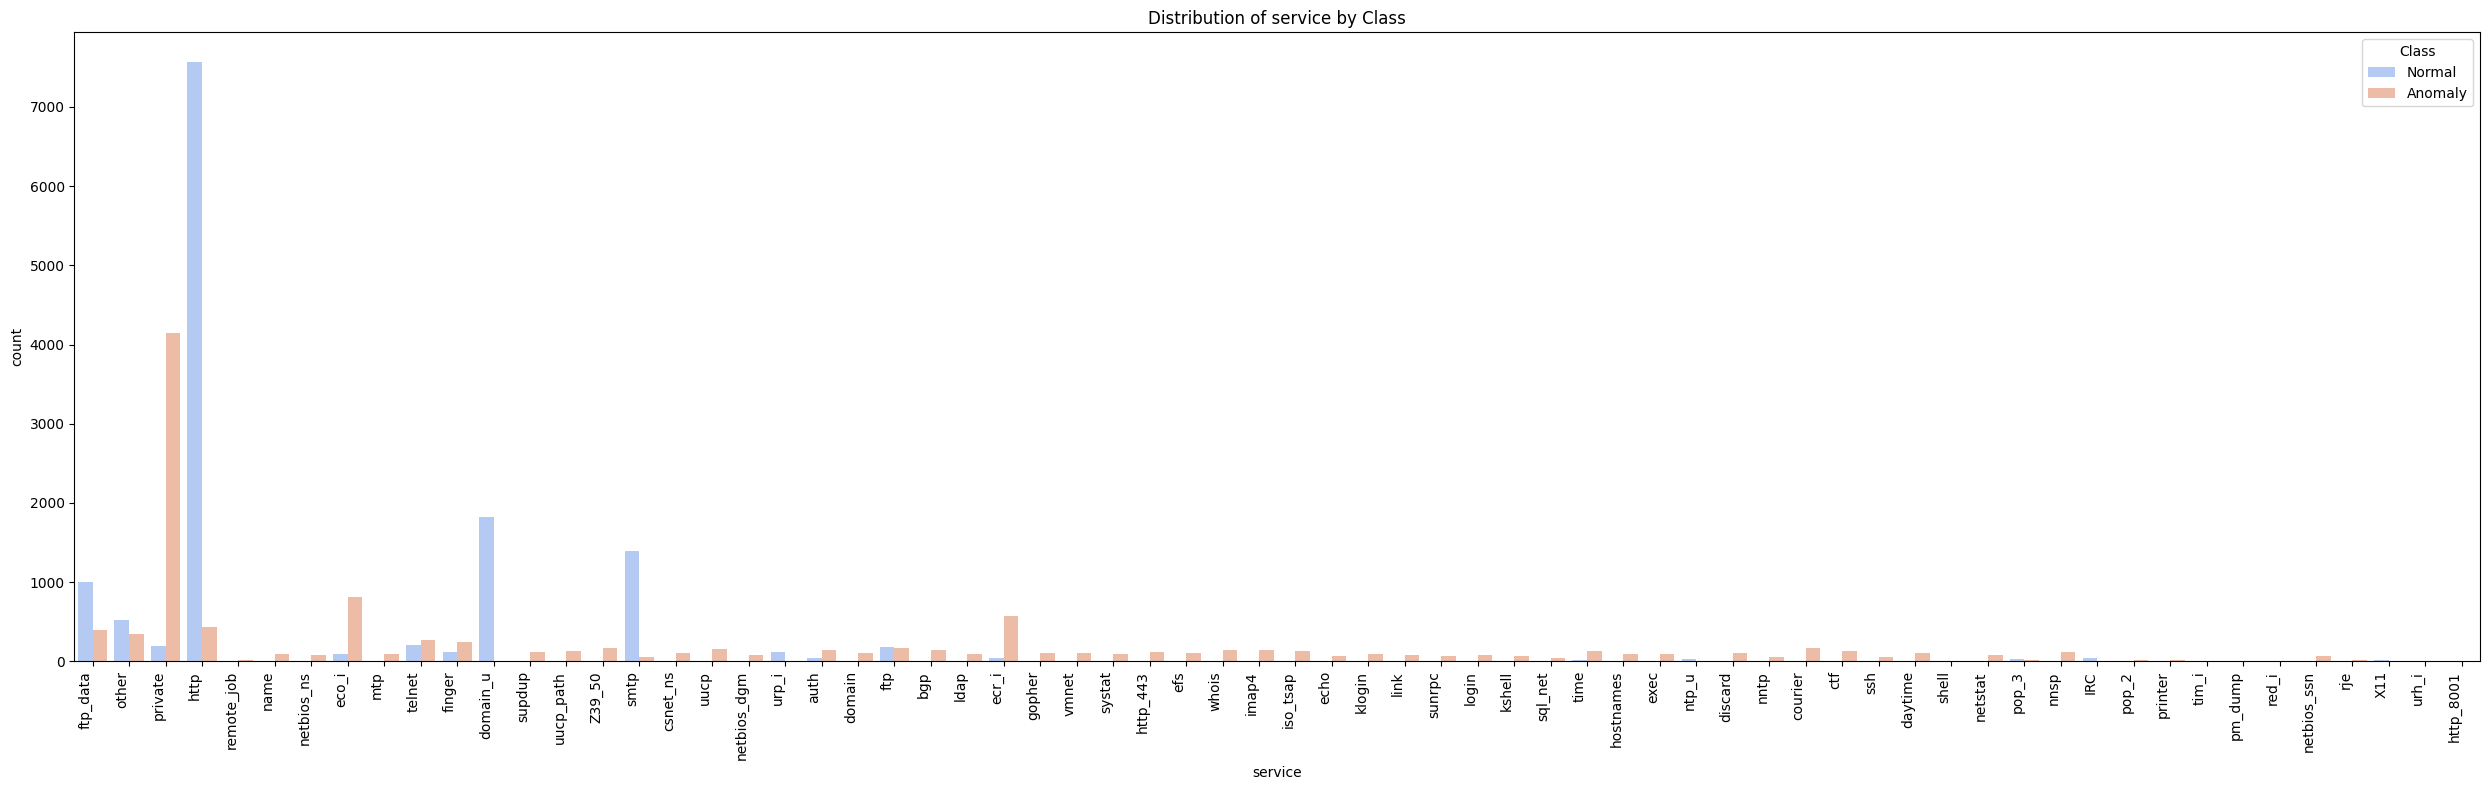

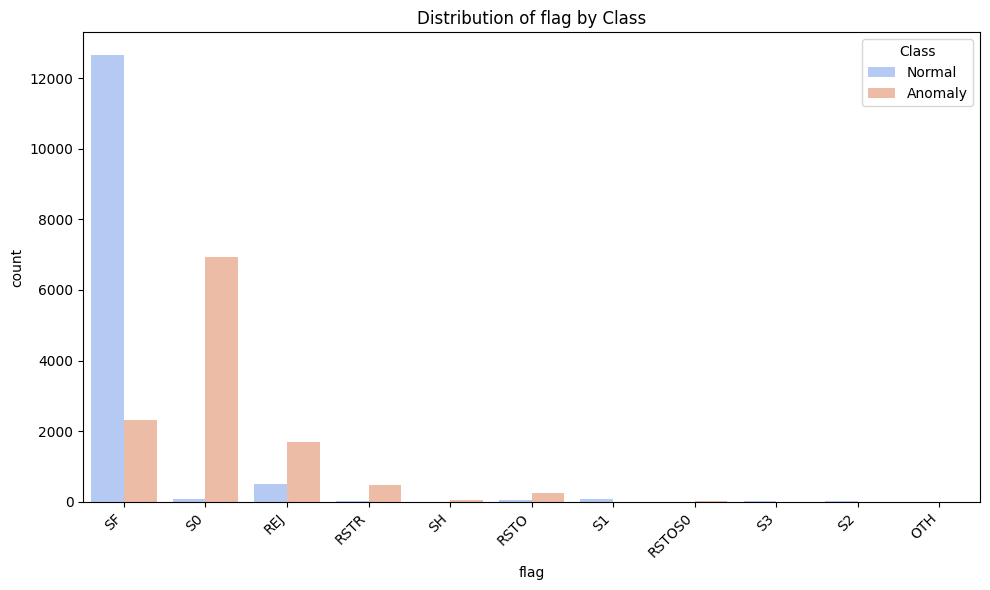

In [14]:

# --- 3. Analyze Categorical Feature Distributions with respect to Class ---
# This loop generates count plots for 'protocol_type', 'service', and 'flag',
# showing how each category within these features is distributed across normal and anomaly classes.
print("\n--- Categorical Feature Distributions by Class ---")
for category in ['protocol_type', 'service', 'flag']:
    # Set a larger figure size for 'service' since it has more unique values,
    # making its labels more readable.
    if category == 'service':
        plt.figure(figsize=(25, 8)) # Increased height for better visibility
        # You might also want to limit the number of services shown if there are too many unique values
        # For example: sns.countplot(y=category, data=train, hue='class', palette="coolwarm", order=train[category].value_counts().index[:30])
    else:
        plt.figure(figsize=(10, 6)) # Default size for other categories
    
    # Create the count plot
    sns.countplot(x=category, data=train, hue='class', palette="coolwarm")
    
    # Set the plot title
    plt.title(f'Distribution of {category} by Class')
    
    # Rotate x-axis labels for better readability, especially for 'service'
    if category == 'service':
        plt.xticks(rotation=90, ha='right') # Rotate more for service, align right
    else:
        plt.xticks(rotation=45, ha='right') # Standard rotation for others
    
    # Add a legend for 'class'
    plt.legend(title='Class', labels=['Normal', 'Anomaly']) 
    
    # Display the plot
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()


In [ ]:

# --- 4. Handle Missing Values ---
# This line removes rows containing any NaN values. It's important to do this early
# if your analysis or subsequent ML steps cannot handle NaNs.
print("\n--- Handling Missing Values ---")
initial_rows = train.shape[0]
train.dropna(inplace=True)
print(f"Removed {initial_rows - train.shape[0]} rows with missing values.")


In [15]:

# --- 5. Check for Duplicate Rows ---
# Identifying and counting duplicate rows helps assess data quality.
print("\n--- Duplicate Rows Check ---")
print(f"Number of duplicate rows in train set: {train.duplicated().sum()}")
# If you want to remove duplicates: train.drop_duplicates(inplace=True)



--- Duplicate Rows Check ---
Number of duplicate rows in train set: 0


In [16]:

# --- 6. Label Encoding Categorical Features ---
# Converts 'object' (string) type columns into numerical representations.
# This is a prerequisite for most machine learning algorithms and correlation analysis.
print("\n--- Applying Label Encoding to Categorical Features ---")
def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)
label_encoding(test)
print("Dataset after Label Encoding (first 5 rows):")
print(train.head())



--- Applying Label Encoding to Categorical Features ---
Dataset after Label Encoding (first 5 rows):
   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       19     9        491          0     0   
1         0              2       41     9        146          0     0   
2         0              1       46     5          0          0     0   
3         0              1       22     9        232       8153     0   
4         0              1       22     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03  


--- Full Correlation Heatmap ---


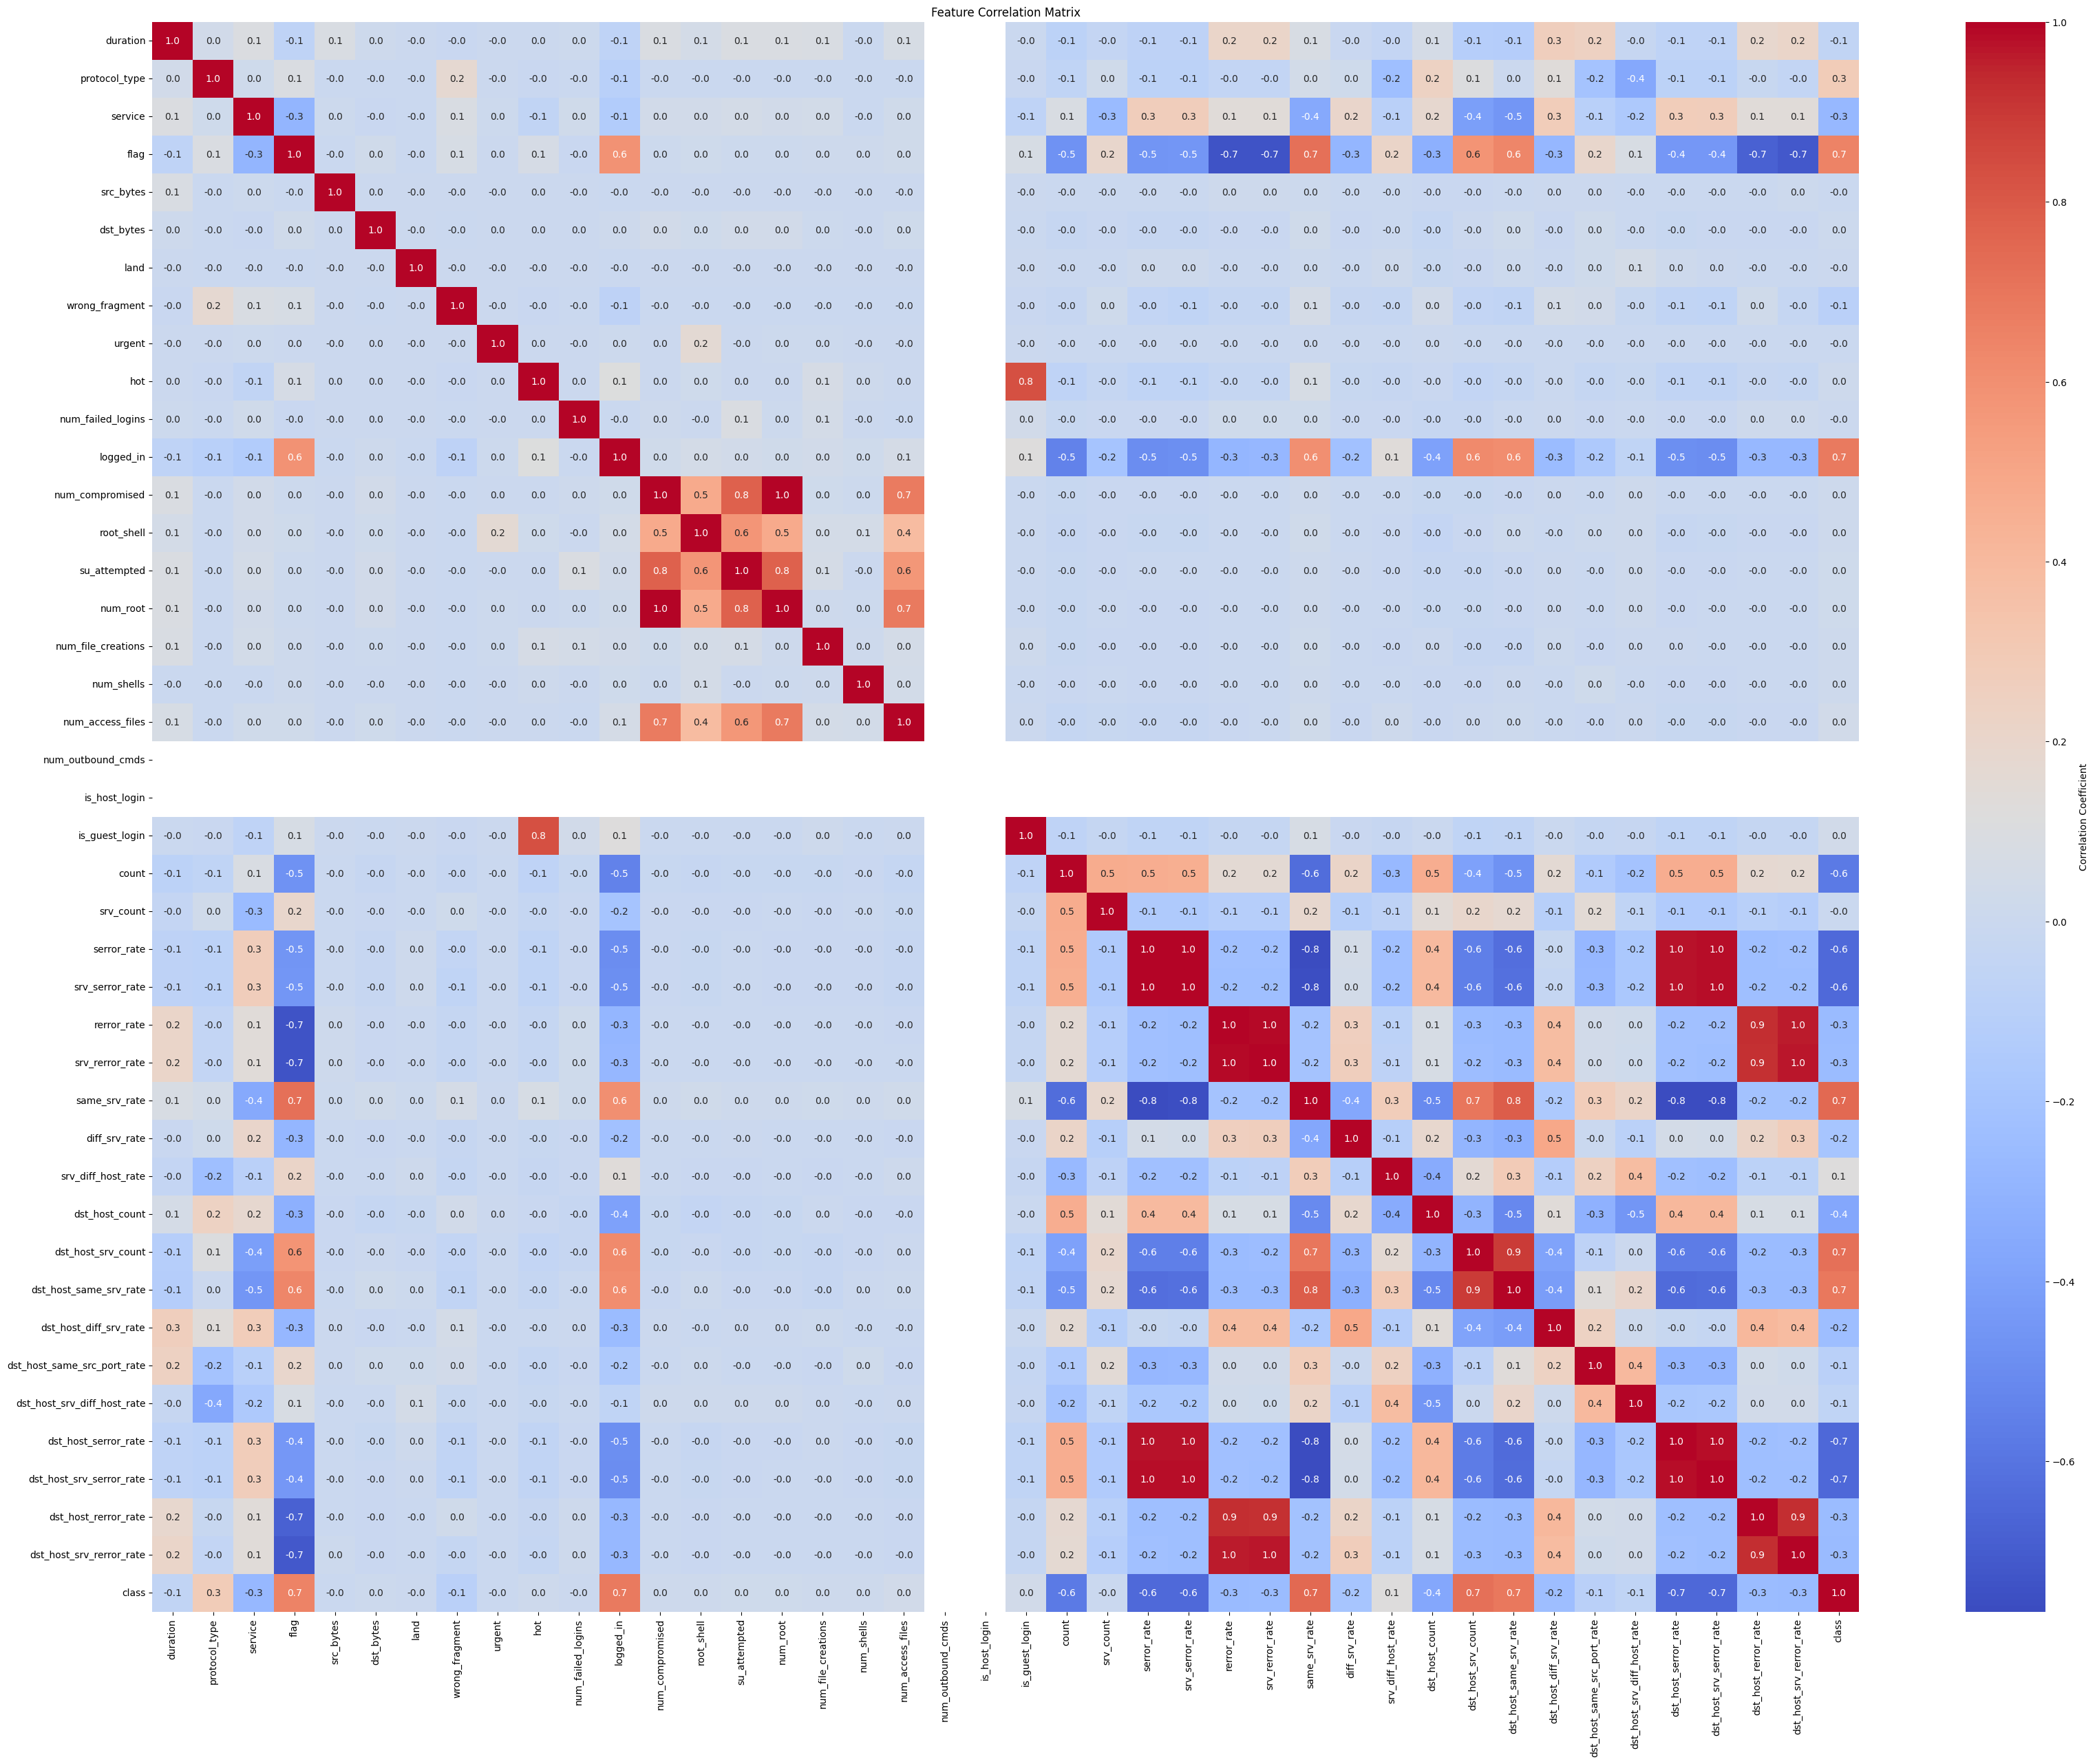

In [17]:

# --- 7. Correlation Analysis (Full Heatmap) ---
# This heatmap visualizes the correlation matrix of all features.
# It helps identify relationships between variables, including with the 'class' label.
print("\n--- Full Correlation Heatmap ---")
plt.figure(figsize=(40, 30)) # Larger figure for comprehensive view
sns.heatmap(train.corr(), annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix')
plt.show()



--- Strong Correlations Analysis ---
Columns with strong correlations (absolute correlation >= 0.7) and their filtered correlation matrix:
Index(['flag', 'hot', 'num_compromised', 'su_attempted', 'num_root',
       'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


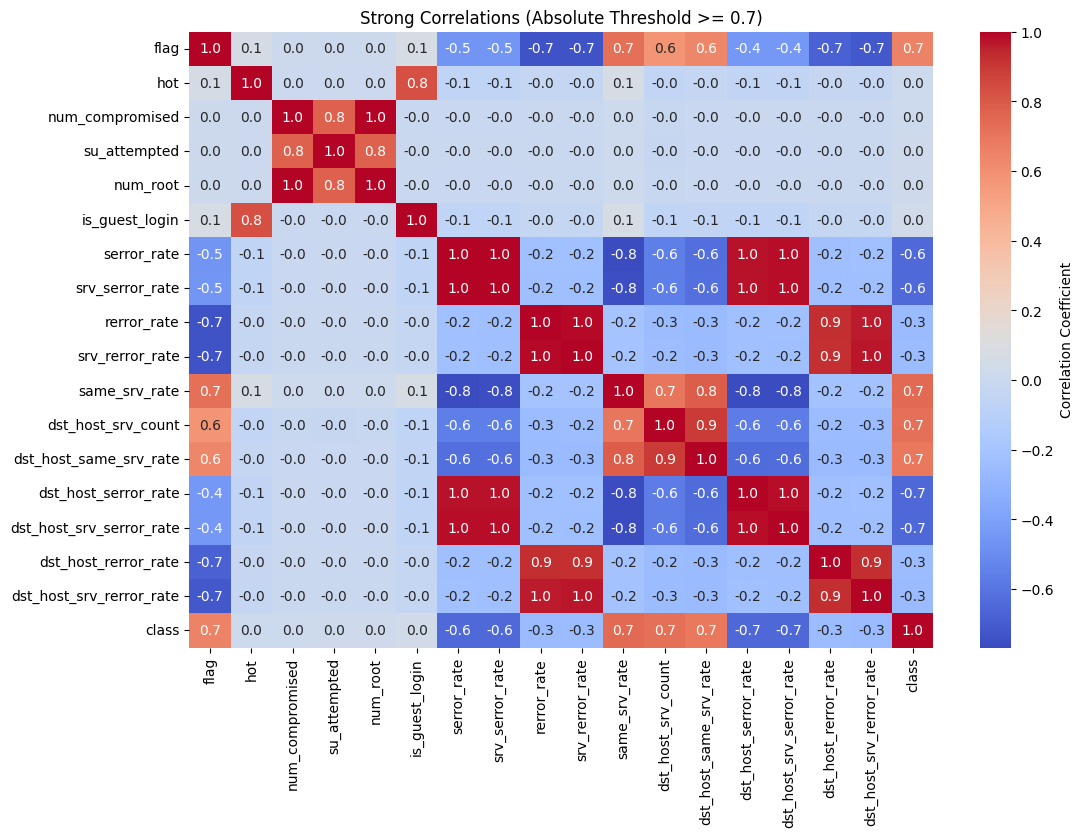

In [18]:

# --- 8. Strong Correlations Analysis ---
# This part filters the correlation matrix to show only strong relationships (above a certain threshold).
# It's useful for identifying highly correlated features, which might indicate multicollinearity
# or features that are redundant.
print("\n--- Strong Correlations Analysis ---")
corr_matrix = train.corr()
threshold = 0.7 # Define your correlation threshold

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False) # Exclude self-correlation (correlation of a feature with itself is always 1)

# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()] # Get columns that have at least one strong correlation
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

print("Columns with strong correlations (absolute correlation >= 0.7) and their filtered correlation matrix:")
print(filtered_columns)

# Plot the heatmap for strong correlations only
plt.figure(figsize=(12, 8)) # Smaller figure for a focused view
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title(f'Strong Correlations (Absolute Threshold >= {threshold})')
plt.show()


In [19]:
# --- 9. Feature Selection: Removing Highly Correlated Features ---
print("\n--- Feature Selection: Removing Highly Correlated Features ---")

features_to_drop = set()
for i in range(len(filtered_columns)):
    for j in range(i + 1, len(filtered_columns)):
        col1 = filtered_columns[i]
        col2 = filtered_columns[j]
        correlation_value = filtered_corr.loc[col1, col2]

        if np.abs(correlation_value) >= threshold:
            print(f"Highly correlated pair found: '{col1}' and '{col2}' with correlation {correlation_value:.2f}")

            if col1 == 'class' or col2 == 'class':
                print(f"  - Skipping dropping as one of the columns is the target 'class'.")
                continue

            # --- MODIFICATION START ---
            # Exclude 'flag' from being dropped if it's one of the columns in the correlated pair
            if col1 == 'flag':
                features_to_drop.add(col2)
                print(f"  - Keeping 'flag' as requested, dropping '{col2}'.")
                continue
            elif col2 == 'flag':
                features_to_drop.add(col1)
                print(f"  - Keeping 'flag' as requested, dropping '{col1}'.")
                continue
            # --- MODIFICATION END ---

            corr_with_class_col1 = np.abs(train[col1].corr(train['class']))
            corr_with_class_col2 = np.abs(train[col2].corr(train['class']))
            
            if corr_with_class_col1 < corr_with_class_col2:
                features_to_drop.add(col1)
                print(f"  - Keeping '{col2}' (corr with class: {corr_with_class_col2:.2f}), dropping '{col1}' (corr with class: {corr_with_class_col1:.2f})")
            elif corr_with_class_col2 < corr_with_class_col1:
                features_to_drop.add(col2)
                print(f"  - Keeping '{col1}' (corr with class: {corr_with_class_col1:.2f}), dropping '{col2}' (corr with class: {corr_with_class_col2:.2f})")
            else:
                features_to_drop.add(col2)
                print(f"  - Correlations with class are equal. Keeping '{col1}', dropping '{col2}'")

features_to_drop_list = list(features_to_drop)

if features_to_drop_list:
    train.drop(columns=features_to_drop_list, inplace=True)
    print(f"\nRemoved highly correlated features: {features_to_drop_list}")
    print(f"Remaining features: {train.columns.tolist()}")
else:
    print("\nNo features were removed based on high correlation and lower correlation with 'class'.")


--- Feature Selection: Removing Highly Correlated Features ---
Highly correlated pair found: 'flag' and 'rerror_rate' with correlation -0.74
  - Keeping 'flag' as requested, dropping 'rerror_rate'.
Highly correlated pair found: 'flag' and 'srv_rerror_rate' with correlation -0.74
  - Keeping 'flag' as requested, dropping 'srv_rerror_rate'.
Highly correlated pair found: 'flag' and 'same_srv_rate' with correlation 0.72
  - Keeping 'flag' as requested, dropping 'same_srv_rate'.
Highly correlated pair found: 'flag' and 'dst_host_srv_rerror_rate' with correlation -0.72
  - Keeping 'flag' as requested, dropping 'dst_host_srv_rerror_rate'.
Highly correlated pair found: 'hot' and 'is_guest_login' with correlation 0.83
  - Keeping 'is_guest_login' (corr with class: 0.04), dropping 'hot' (corr with class: 0.01)
Highly correlated pair found: 'num_compromised' and 'su_attempted' with correlation 0.78
  - Keeping 'su_attempted' (corr with class: 0.03), dropping 'num_compromised' (corr with class: 0

In [20]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,...,is_guest_login,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,0,2,2,0.00,0.00,150,0.03,0.17,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,0,13,1,0.15,0.00,255,0.60,0.88,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,0,123,6,0.07,0.00,255,0.05,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,0,5,5,0.00,0.00,30,0.00,0.03,0.04,1
4,0,1,22,9,199,420,0,0,0,0,...,0,30,32,0.00,0.09,255,0.00,0.00,0.00,1


In [21]:
print(train.corr())

                             duration  protocol_type   service      flag  \
duration                     1.000000       0.036421  0.101301 -0.066634   
protocol_type                0.036421       1.000000  0.025322  0.094926   
service                      0.101301       0.025322  1.000000 -0.295491   
flag                        -0.066634       0.094926 -0.295491  1.000000   
src_bytes                    0.084864      -0.001286  0.008554 -0.006599   
dst_bytes                    0.013258      -0.004734 -0.013782  0.027606   
land                        -0.001012      -0.001123 -0.006896 -0.006593   
wrong_fragment              -0.010358       0.176420  0.088169  0.068693   
urgent                      -0.000486      -0.000794  0.011325  0.004744   
num_failed_logins            0.011108      -0.003305  0.029601 -0.010920   
logged_in                   -0.063703      -0.101810 -0.138824  0.587882   
root_shell                   0.050547      -0.004964  0.038780  0.019854   
su_attempted

In [22]:
# --- 10. Save the final processed DataFrame to CSV ---
# Define the output filename
output_csv_filename = 'processed_train_data.csv'
output_csv_filename_test='processed_test_data.csv'

# Save the DataFrame to CSV
# index=False prevents pandas from writing the DataFrame's index as a column in the CSV
train.to_csv(output_csv_filename, index=False)
test.drop(columns=features_to_drop_list, inplace=True)
test.to_csv(output_csv_filename_test, index=False)
print(f"\nFinal processed data saved to '{output_csv_filename}'")


Final processed data saved to 'processed_train_data.csv'
